# A. Outliers Explanation

## Purpose

We will:

- Identify outliers in Normally distributed variables.
- Identify outliers in skewed variables.

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [42]:
# Load the Boston House dataset from sklearn
boston_dataset = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/FSDS_Guidelines/master/p1/v3/w1/P1W1D2PM%20-%20Feature%20Engineering%20-%20Part%202%20-%20Boston.csv')

# Create a dataframe with the independent variables
# Legends : 
  # - CRIM     per capita crime rate by town
  # - RM       average number of rooms per dwelling
  # - LSTAT    % lower status of the population

boston = boston_dataset[['RM', 'LSTAT', 'CRIM']]
boston.head()

,RM,LSTAT,CRIM
0,6.575,4.98,0.00632
1,6.421,9.14,0.02731
2,7.185,4.03,0.02729
3,6.998,2.94,0.03237
4,7.147,5.33,0.06905


In [43]:
# Load the Titanic dataset

url = 'https://www.openml.org/data/get_csv/16826755/phpMYEkMl'
titanic = pd.read_csv(url, usecols=['age', 'fare'])

# The variables age and fare have missing values. For this missing value, let's remove them.
titanic.dropna(subset=['age', 'fare'], inplace=True)
titanic['age'] = pd.to_numeric(titanic['age'], errors = 'coerce')
titanic['fare'] = pd.to_numeric(titanic['fare'], errors = 'coerce')
titanic['age'] = titanic['age'].astype(float)
titanic['fare'] = titanic['fare'].astype(float)

print('Shape data : ', titanic.shape, '\n')
print(titanic.info(), '\n')
titanic.head()

Shape data :  (1309, 2) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     1046 non-null   float64
 1   fare    1308 non-null   float64
dtypes: float64(2)
memory usage: 20.6 KB
None 



,age,fare
0,29.0000,211.3375
1,0.9167,151.5500
2,2.0000,151.5500
3,30.0000,151.5500
4,25.0000,151.5500


## Identifikasi distribusi variabel

Dalam variabel terdistribusi normal, outlier adalah nilai yang berada di luar rata-rata plus atau minus 3 kali standar deviasi. Namun, jika variabelnya miring, kami menemukan outlier menggunakan rentang antar-kuantil. Untuk memutuskan metode mana yang digunakan untuk mendeteksi outlier, pertama-tama kita perlu mengetahui distribusi variabel.

Kita dapat menggunakan histogram untuk menentukan apakah variabel terdistribusi secara normal. Kita juga dapat menggunakan boxplot untuk memvisualisasikan outlier secara langsung. Boxplot adalah cara standar untuk menampilkan distribusi variabel menggunakan kuartil pertama, median, kuartil ketiga, dan kumis.

Melihat boxplot, Anda dapat dengan mudah mengidentifikasi:

- Median, ditunjukkan dengan garis di dalam kotak.
- Rentang antar-kuantil (IQR), kotak itu sendiri.
- Kuantil, 25 (Q1) adalah ujung bawah dan 75 (Q3) ujung atas kotak.
- Wiskers, yang meluas ke:
   -- kumis atas: Q3 + 1,5 x IQR
   -- kumis bawah: Q1 -1,5 x IQR

Nilai apa pun yang berada di luar kumis dianggap sebagai outlier. Mari kita lihat contoh-contoh di bawah ini.

In [44]:
# Function to create histogram and boxplot.
# This functions takes a dataframe (df) and the variable of interest as arguments.

def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

## Normally distributed variables

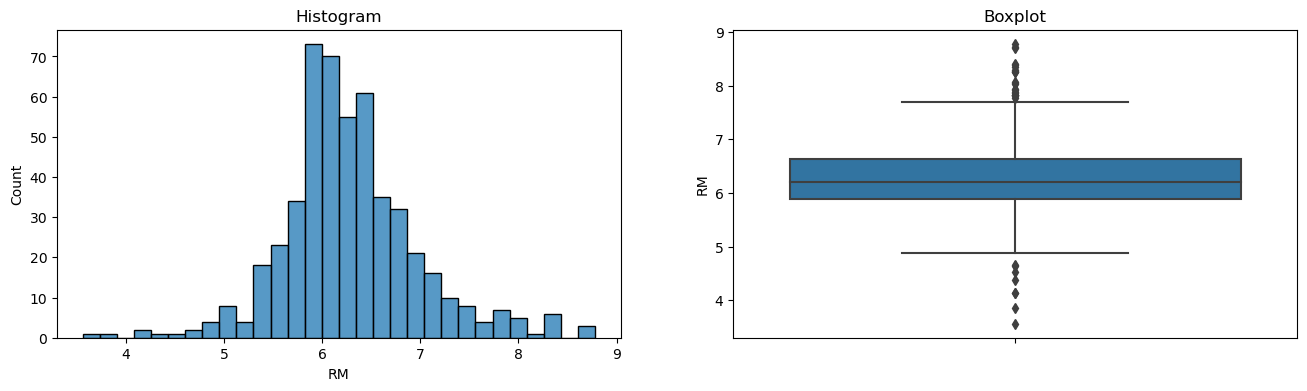


Skewness Value :  0.40361213328874385


In [45]:
# Let's start with the variable RM from the Boston House dataset.
# RM is the average number of rooms per dwelling

diagnostic_plots(boston, 'RM')
print('\nSkewness Value : ', boston['RM'].skew())

Dari histogram, kita melihat bahwa variabel rm mendekati distribusi Gaussian dengan cukup baik. Dalam plot kotak, kita melihat bahwa variabel dapat memiliki outlier, karena ada banyak titik di luar kumis, di kedua ujung distribusi.

### Skewed Variables

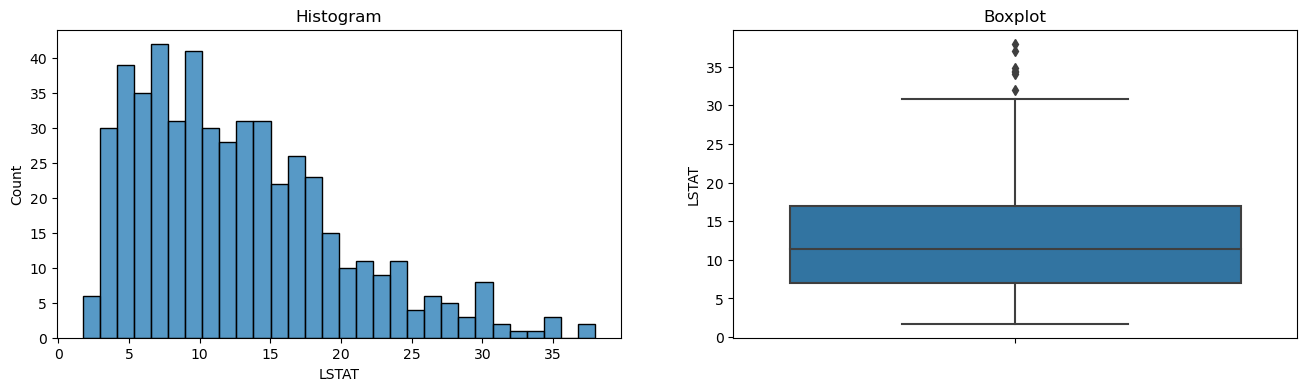


Skewness Value :  0.9064600935915367


In [46]:
# Variable LSTAT from the boston house dataset
# LSTAT is the % lower status of the population

diagnostic_plots(boston, 'LSTAT')
print('\nSkewness Value : ', boston['LSTAT'].skew())

LSTAT tidak berdistribusi normal, ia miring dengan ekor ke kanan. Menurut boxplot, ada beberapa outlier di ujung kanan distribusi variabel.

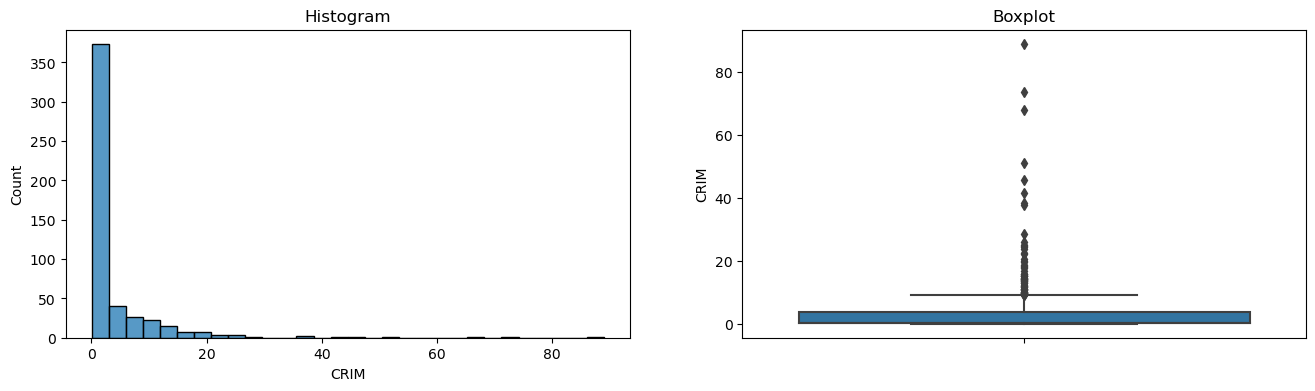


Skewness Value :  5.223148798243851


In [47]:
# Variable CRIM from the boston house dataset
# CRIM is the per capita crime rate by town

diagnostic_plots(boston, 'CRIM')
print('\nSkewness Value : ', boston['CRIM'].skew())

CRIM sangat miring, dengan ekor ke kanan. Tampaknya ada beberapa outlier juga di ujung kanan distribusi, menurut boxplot.

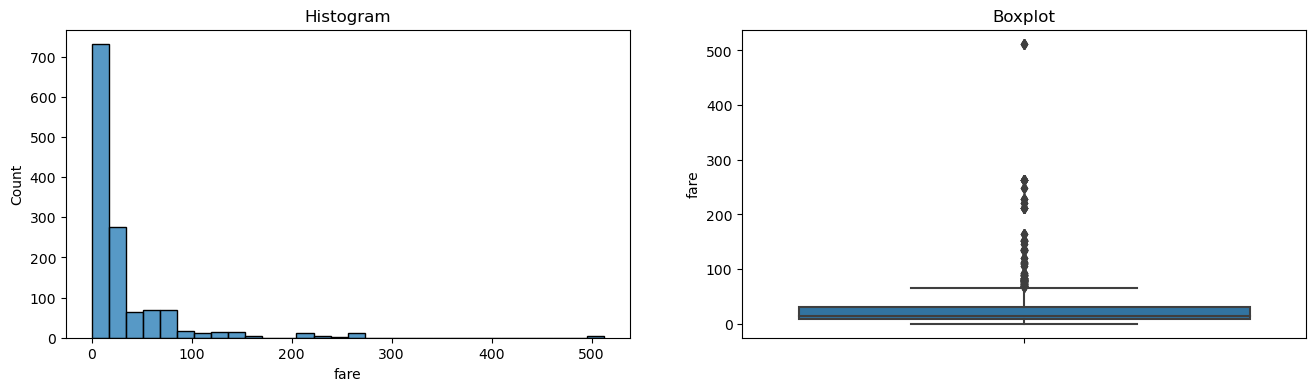


Skewness Value :  4.367709134122922


In [48]:
# Variable Fare from the titanic dataset
# Fare is the price paid for the ticket by the passengers

diagnostic_plots(titanic, 'fare')
print('\nSkewness Value : ', titanic['fare'].skew())

Tarif juga sangat miring, dan menunjukkan beberapa nilai yang tidak biasa di ujung kanan distribusinya.

Di sel berikutnya, kami akan mengidentifikasi outlier menggunakan:
- rata-rata dan standar deviasi untuk variabel `RM` dan `Usia` masing-masing dari set data boston dan titanic.
- rentang inter-kuantil untuk mengidentifikasi outlier untuk variabel `LSTAT`, `CRIM`, dan `Fare` dari set data boston dan titanic.

### Deteksi outlier untuk variabel terdistribusi normal

In [49]:
# Function to find upper and lower boundaries for normally distributed variables
# Calculate the boundaries outside which sit the outliers for a Gaussian distribution

def find_normal_boundaries(df, variable):
    upper_boundary = df[variable].mean() + 3 * df[variable].std()
    lower_boundary = df[variable].mean() - 3 * df[variable].std()

    return upper_boundary, lower_boundary

In [50]:
# calculate boundaries for RM
upper_boundary, lower_boundary = find_normal_boundaries(boston, 'RM')
upper_boundary, lower_boundary

(8.39248581759775, 4.176782957105807)

Dari penjelasan di atas kami menyimpulkan bahwa nilai **lebih besar dari 8,4** atau **lebih kecil dari 4,2** sangat jarang terjadi untuk variabel `RM`. Oleh karena itu, kita dapat menganggap mereka outlier.

In [51]:
# Inspect the number and percentage of outliers for `RM`

print('Total number of houses: {}'.format(len(boston)))
print('Houses with more than 8.4 rooms (right end outliers) : {}'.format(len(boston[boston['RM'] > upper_boundary])))
print('Houses with less than 4.2 rooms (left end outliers.  : {}'.format(len(boston[boston['RM'] < lower_boundary])))
print('')
print('% right end outliers : {}'.format(len(boston[boston['RM'] > upper_boundary]) / len(boston) * 100))
print('% left end outliers  : {}'.format(len(boston[boston['RM'] < lower_boundary]) / len(boston) * 100))

Total number of houses: 506
Houses with more than 8.4 rooms (right end outliers) : 4
Houses with less than 4.2 rooms (left end outliers.  : 4

% right end outliers : 0.7905138339920948
% left end outliers  : 0.7905138339920948


Menggunakan Analisis Nilai Ekstrim kami mengidentifikasi outlier di kedua ujung distribusi `RM`. Persentase outlier kecil (1,58% mengingat 2 ekor bersamaan), yang masuk akal, karena kami menemukan outlier dengan tepat. Artinya, nilai langka, kejadian langka.

Mari beralih ke `Age` di kumpulan data titanic.

In [52]:
# Calculate boundaries for `Age` in the titanic

upper_boundary, lower_boundary = find_normal_boundaries(titanic, 'age')
upper_boundary, lower_boundary

(73.12163361219909, -13.359364587342487)

Batas atas adalah **73 tahun**, yang berarti penumpang berusia di atas 73 tahun sangat sedikit, jika ada, di titanic. Batas bawah negatif. Karena usia negatif tidak ada, masuk akal untuk mencari outlier menggunakan batas atas.

In [53]:
# Lets look at the number and percentage of outliers

print('Total passengers         : {}'.format(len(titanic)))
print('Passengers older than 73 : {}'.format(len(titanic[titanic['age'] > upper_boundary])))
print('')
print('% of passengers older than 73 : {}'.format(len(titanic[titanic['age'] > upper_boundary]) / len(titanic) * 100))

Total passengers         : 1309
Passengers older than 73 : 3

% of passengers older than 73 : 0.2291825821237586


Ada 3 penumpang yang lebih tua dari 73 tahun di kapal titanic, yang bisa dianggap outlier, karena mayoritas penduduknya jauh lebih muda.

### Outlier detection for skewed variables

In [54]:
# Function to find upper and lower boundaries for skewed distributed variables
# Let's calculate the boundaries outside which sit the outliers for skewed distributions
# Distance passed as an argument, gives us the option to estimate 1.5 times or 3 times the IQR to calculate the boundaries.

def find_skewed_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [55]:
# Looking for outliers, using the interquantile proximity rule IQR * 1.5, for `LSTAT` in the boston house dataset

upper_boundary, lower_boundary = find_skewed_boundaries(boston, 'LSTAT', 1.5)
upper_boundary, lower_boundary

(31.962500000000006, -8.057500000000005)

In [56]:
# Lets look at the number and percentage of outliers for `LSTAT`

print('Total houses : {}'.format(len(boston)))
print('Houses with LSTAT bigger than 32   : {}'.format(len(boston[boston['LSTAT'] > upper_boundary])))
print('')
print('% houses with LSTAT bigger than 32 : {}'.format(len(boston[boston['LSTAT'] > upper_boundary])/len(boston) * 100))

Total houses : 506
Houses with LSTAT bigger than 32   : 7

% houses with LSTAT bigger than 32 : 1.383399209486166


Batas atas menunjukkan nilai ~32. Batas bawahnya negatif, namun variabel `LSTAT` tidak mengambil nilai negatif. Jadi untuk menghitung outlier untuk LSTAT kami hanya menggunakan batas atas. Ini bertepatan dengan apa yang kami amati di plot kotak sebelumnya di buku catatan. Outlier hanya duduk di ujung kanan distribusi LSTAT. **Kami mengamati 7 rumah, 1,38% dari kumpulan data, dengan nilai yang sangat tinggi untuk `LSTAT`.**

In [57]:
# Looking for outliers, using the interquantile proximity rule IQR * 1.5, for `CRIM` in the boston house dataset

upper_boundary, lower_boundary = find_skewed_boundaries(boston, 'CRIM', 1.5)
upper_boundary, lower_boundary

(9.06963875, -5.31051125)

In [58]:
# Lets look at the number and percentage of outliers for `CRIM`

print('Total houses : {}'.format(len(boston)))
print('Houses with CRIM bigger than 9   : {}'.format(len(boston[boston['CRIM'] > upper_boundary])))
print('')
print('% houses with CRIM bigger than 9 : {}'.format(len(boston[boston['CRIM'] > upper_boundary]) / len(boston) * 100))

Total houses : 506
Houses with CRIM bigger than 9   : 66

% houses with CRIM bigger than 9 : 13.043478260869565


In [59]:
# Looking for outliers, using the interquantile proximity rule IQR * 3, now lets looking for extremely high values for `CRIM` in the boston house dataset

upper_boundary, lower_boundary = find_skewed_boundaries(boston, 'CRIM', 3)
upper_boundary, lower_boundary

(14.462195000000001, -10.7030675)

In [60]:
# Lets look at the number and percentage of outliers for `CRIM`

print('Total houses : {}'.format(len(boston)))
print('Houses with CRIM bigger than 14   : {}'.format(len(boston[boston['CRIM'] > upper_boundary])))
print('')
print('% houses with CRIM bigger than 14 : {}'.format(len(boston[boston['CRIM'] > upper_boundary]) / len(boston) * 100))

Total houses : 506
Houses with CRIM bigger than 14   : 30

% houses with CRIM bigger than 14 : 5.928853754940711


When using :
- the 1.5 times inter-quantile range to find outliers, we find that **~13%** of the houses show unusually high crime rate areas. 
- the 3 times inter-quantile range to find outliers, we find that **~6%** of the houses show unusually high crime rate areas. 

For `CRIM` as well, the lower boundary is negative, so it only makes sense to use the upper boundary to calculate outliers, as the variable takes only positive values. This coincides with what we observed in `CRIM`'s boxplot earlier in this notebook.

In [61]:
# Finally, identify outliers in `Fare` in the titanic dataset. Lets look again for extreme values using IQR * 3

upper_boundary, lower_boundary = find_skewed_boundaries(titanic, 'fare', 3)
upper_boundary, lower_boundary

(101.4126, -62.24179999999999)

In [62]:
# Lets look at the number and percentage of passengers who paid extremely high Fares

print('Total passengers : {}'.format(len(titanic)))
print('Passengers who paid more than 117   : {}'.format(len(titanic[titanic['fare'] > upper_boundary])))
print('')
print('% passengers who paid more than 117 : {}'.format(len(titanic[titanic['fare'] > upper_boundary])/len(titanic) * 100))

Total passengers : 1309
Passengers who paid more than 117   : 84

% passengers who paid more than 117 : 6.417112299465241


Untuk Tarif, serta untuk semua variabel lain di notebook ini yang menunjukkan ekor ke kanan, batas bawahnya negatif. Jadi kita akan menggunakan batas atas untuk menentukan outlier. Kami mengamati bahwa 6,4% dari nilai kumpulan data berada di atas batas.

# B. Trimming 

## Pemangkasan atau pemotongan

Pemangkasan, juga dikenal sebagai pemotongan, melibatkan penghapusan outlier dari kumpulan data. Kami hanya perlu memutuskan metrik untuk menentukan outlier. Seperti yang kita lihat di bagian 3, ini bisa berupa pendekatan Gaussian untuk variabel terdistribusi normal atau aturan kedekatan jarak antar-kuantil untuk variabel miring.

### Keuntungan

- cepat

### Keterbatasan

- outlier untuk satu variabel dapat berisi informasi yang berguna di variabel lain
- jika ada outlier di banyak variabel, kita bisa menghapus sebagian besar dataset

## Penting

Outlier harus dideteksi DAN **HANYA dihapus** dari set pelatihan, dan BUKAN dari set pengujian. Jadi pertama-tama kita harus membagi kumpulan data kita menjadi pelatihan dan pengujian, dan menghapus outlier di kumpulan pelatihan, tetapi tetap menyimpannya di kumpulan pengujian, dan mengukur seberapa baik kinerja model kita.

## Tujuan

Kita akan melihat cara melakukan **pemangkasan** menggunakan Kumpulan Data Boston House.

In [63]:
# Create a dataframe with the independent variables
# Legends : 
  # - DIS      weighted distances to five Boston employment centres
  # - LSTAT    % lower status of the population
  # - CRIM     per capita crime rate by town

boston = boston_dataset[['DIS', 'LSTAT', 'CRIM']]
boston.head()

,DIS,LSTAT,CRIM
0,4.0900,4.98,0.00632
1,4.9671,9.14,0.02731
2,4.9671,4.03,0.02729
3,6.0622,2.94,0.03237
4,6.0622,5.33,0.06905


In [64]:
# Function to create histogram and boxplot.
# Function takes a dataframe (df) and the variable of interest as arguments

def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

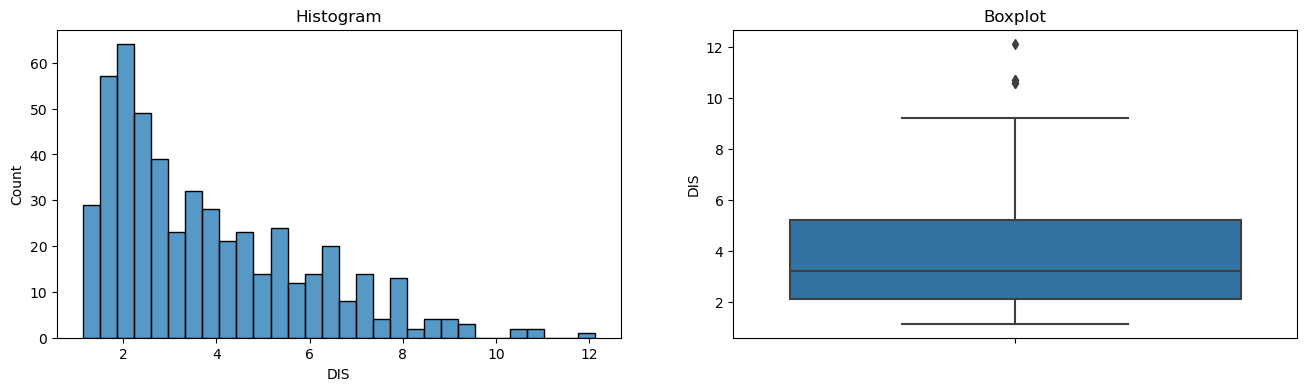

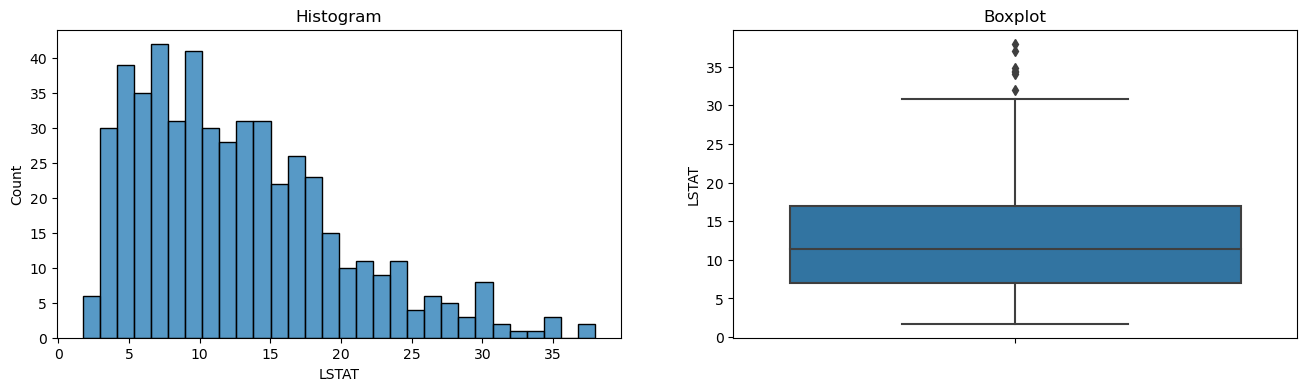

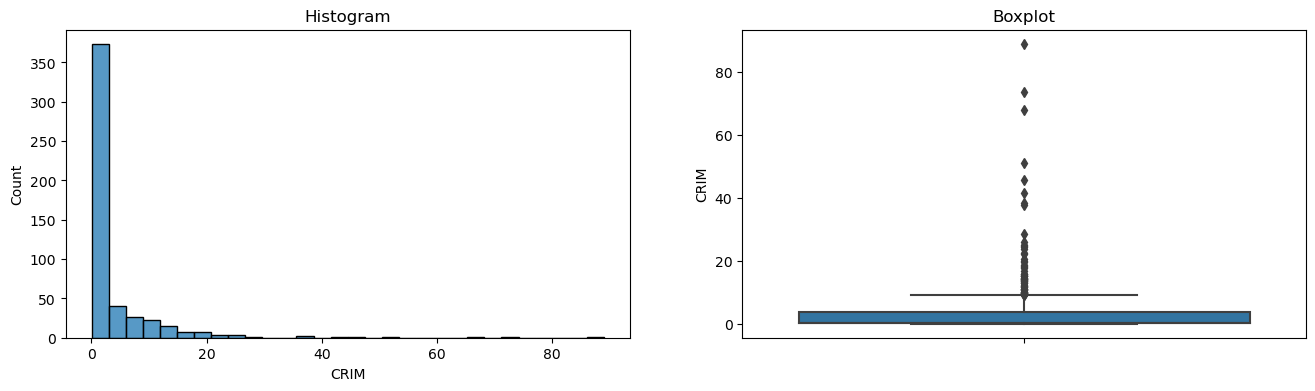

In [65]:
# Let's find outliers in `DIS`, `LSTAT`, `CRIM`

diagnostic_plots(boston, 'DIS')
diagnostic_plots(boston, 'LSTAT')
diagnostic_plots(boston, 'CRIM')


Ada outlier di semua variabel di atas.

In [66]:
# Function to find upper and lower boundaries for skewed distributed variables
# Let's calculate the boundaries outside which sit the outliers for skewed distributions
# Distance passed as an argument, gives us the option to estimate 1.5 times or 3 times the IQR to calculate the boundaries.

def find_skewed_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [67]:
# Limits for `DIS`
DIS_upper_limit, DIS_lower_limit = find_skewed_boundaries(boston, 'DIS', 1.5)
DIS_upper_limit, DIS_lower_limit

# Limits for `LSTAT`
LSTAT_upper_limit, LSTAT_lower_limit = find_skewed_boundaries(boston, 'LSTAT', 1.5)
LSTAT_upper_limit, LSTAT_lower_limit

# Limits for `CRIM`
CRIM_upper_limit, CRIM_lower_limit = find_skewed_boundaries(boston, 'CRIM', 1.5)
CRIM_upper_limit, CRIM_lower_limit

print('DIS_upper_limit : ', DIS_upper_limit)
print('DIS_lower_limit : ', DIS_lower_limit, '\n')
print('LSTAT_upper_limit : ', LSTAT_upper_limit)
print('LSTAT_lower_limit : ', LSTAT_lower_limit, '\n')
print('CRIM_upper_limit : ', CRIM_upper_limit)
print('CRIM_lower_limit : ', CRIM_lower_limit)

DIS_upper_limit :  9.820800000000002
DIS_lower_limit :  -2.5322000000000005 

LSTAT_upper_limit :  31.962500000000006
LSTAT_lower_limit :  -8.057500000000005 

CRIM_upper_limit :  9.06963875
CRIM_lower_limit :  -5.31051125


In [68]:
# Flag the outliers in category `DIS`
outliers_DIS = np.where(boston['DIS'] > DIS_upper_limit, True,
                       np.where(boston['DIS'] < DIS_lower_limit, True, False))

# Flag the outliers in category `LSTAT`
outliers_LSTAT = np.where(boston['LSTAT'] > LSTAT_upper_limit, True,
                       np.where(boston['LSTAT'] < LSTAT_lower_limit, True, False))

# Flag the outliers in category `CRIM`
outliers_CRIM = np.where(boston['CRIM'] > CRIM_upper_limit, True,
                       np.where(boston['CRIM'] < CRIM_lower_limit, True, False))

print(outliers_DIS[:10])

[False False False False False False False False False False]


In [69]:
# Let's trimm the dataset

boston_trimmed = boston.loc[~(outliers_DIS + outliers_LSTAT + outliers_CRIM)]
print('Size dataset - Before trimming : ', boston.shape)
print('Size dataset - After trimming  : ', boston_trimmed.shape)

Size dataset - Before trimming :  (506, 3)
Size dataset - After trimming  :  (434, 3)


Kita dapat melihat bahwa dengan menggunakan pemangkasan, **kami menghapus 72 baris**, dari kumpulan data 506 baris, sekitar **~14,2%** data telah dihapus. Inilah sebagian besar alasannya, kami cenderung tidak banyak menggunakan pemangkasan dalam pembelajaran mesin. Tetapi jika hanya beberapa variabel yang menunjukkan proporsi outlier yang kecil, pemangkasan bisa berhasil.

DIS - Before Trimming


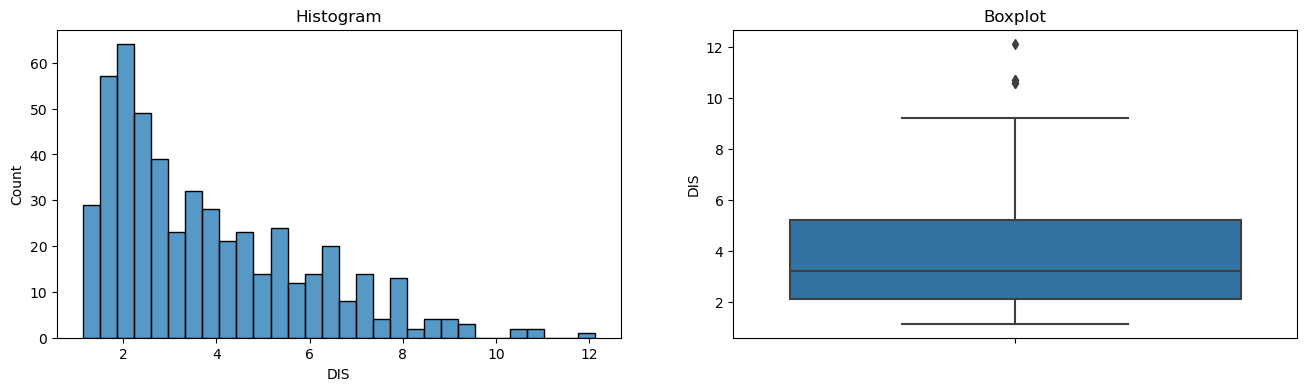


DIS - After Trimming


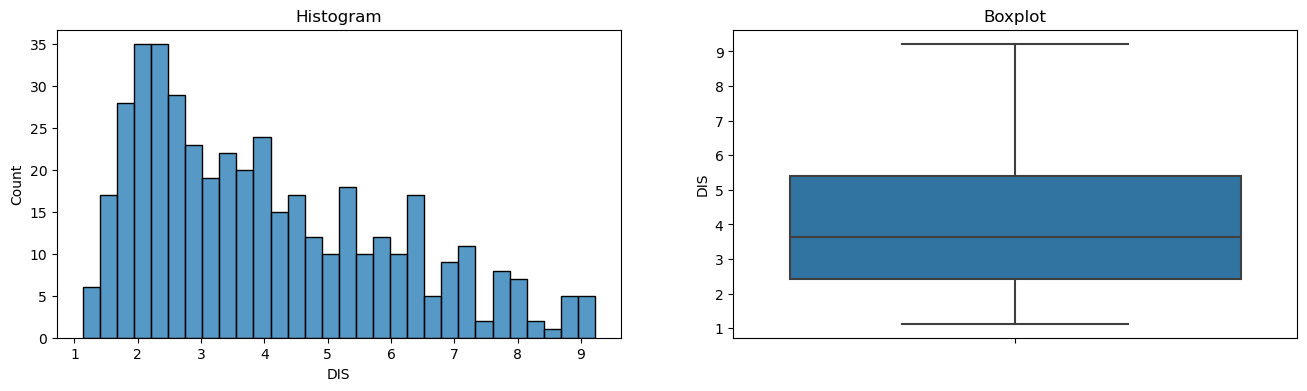


LSTAT - Before Trimming


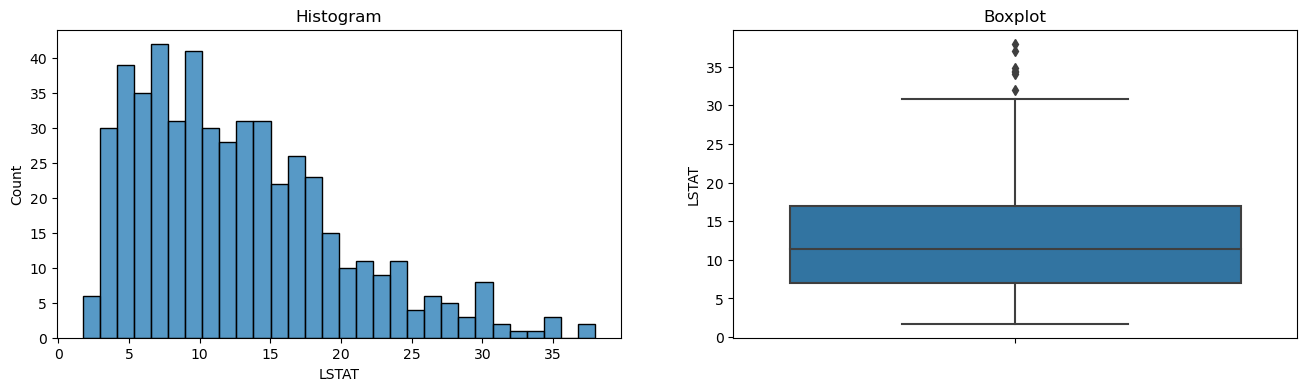


LSTAT - After Trimming


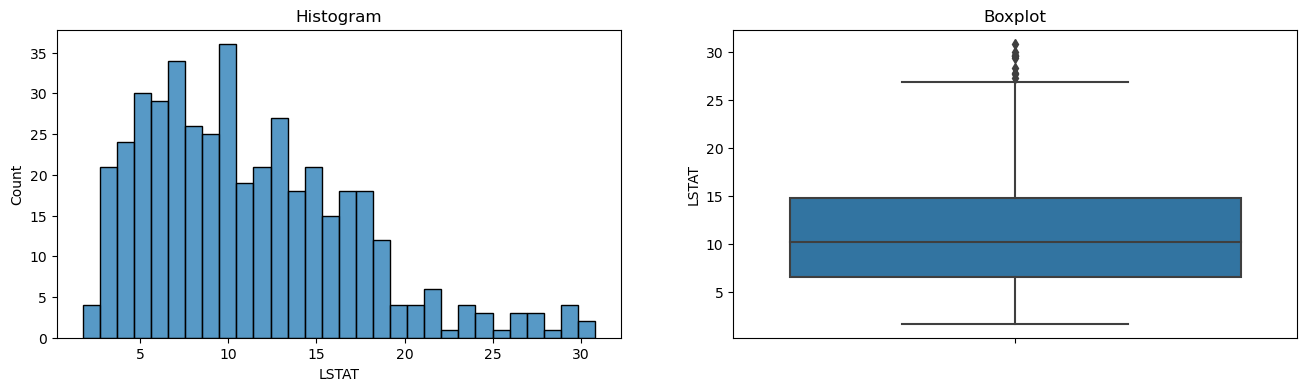


CRIM - Before Trimming


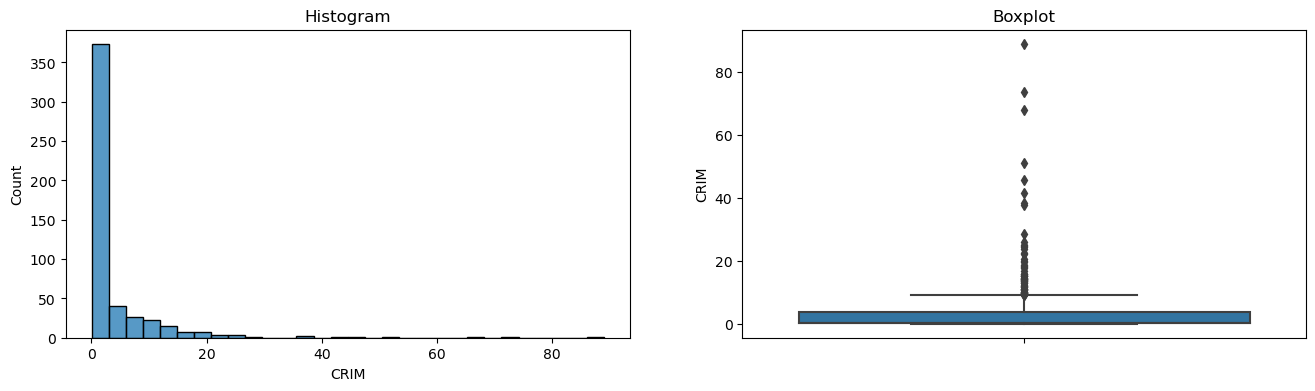


CRIM - After Trimming


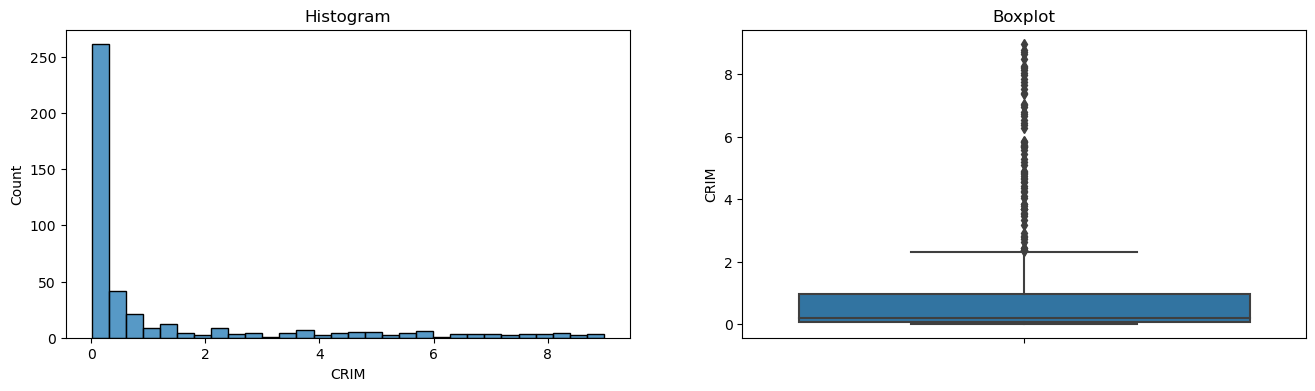

In [70]:
# Let's find outliers in `DIS`, `LSTAT`, `CRIM`

print('DIS - Before Trimming')
diagnostic_plots(boston, 'DIS')
print('\nDIS - After Trimming')
diagnostic_plots(boston_trimmed, 'DIS')

print('\nLSTAT - Before Trimming')
diagnostic_plots(boston, 'LSTAT')
print('\nLSTAT - After Trimming')
diagnostic_plots(boston_trimmed, 'LSTAT')

print('\nCRIM - Before Trimming')
diagnostic_plots(boston, 'CRIM')
print('\nCRIM - After Trimming')
diagnostic_plots(boston_trimmed, 'CRIM')

Untuk `LSTAT` dan `CRIM`, kami masih melihat banyak outlier. **Saat kami menghapus titik data dari kumpulan data kami, semua parameter distribusi dihitung ulang**, yaitu rata-rata, kuantil, dan rentang antar-kuantil, oleh karena itu, dalam variabel -trimmed- baru, nilai yang sebelumnya tidak dianggap outlier, sekarang. Ini adalah karakteristik yang tidak diinginkan dari cara mengatasi outlier ini.

# C. Censoring

## Menyensor atau Membatasi.

**Mensensor**, atau **membatasi**, berarti membatasi distribusi maksimum dan/atau minimum pada nilai arbitrer. Dengan kata lain, nilai yang lebih besar atau lebih kecil dari yang ditentukan secara sewenang-wenang akan **disensor**.

Pembatasan dapat dilakukan pada kedua ekor, atau hanya salah satu ekor, tergantung pada variabel dan penggunanya.

### Keuntungan

- tidak menghapus data

### Keterbatasan

- mendistorsi distribusi variabel
- mendistorsi hubungan antar variabel

## Penting

Saat melakukan pembatasan, kami cenderung membatasi nilai baik di set pelatihan maupun pengujian. Penting untuk diingat bahwa nilai pembatasan HARUS diturunkan dari set kereta. Dan kemudian gunakan nilai yang sama untuk membatasi variabel dalam set pengujian

## Tujuan

Kita akan melihat cara melakukan **pembatasan** dengan aturan kedekatan teks tebal rentang antar-kuantil menggunakan Kumpulan Data Boston House

In [76]:
# !pip install feature-engine

from feature_engine.outliers import Winsorizer

In [77]:
# Create a dataframe with the independent variables
# Legends : 
  # - DIS      weighted distances to five Boston employment centres
  # - LSTAT    % lower status of the population
  # - CRIM     per capita crime rate by town
  
boston = boston_dataset[['DIS', 'LSTAT', 'CRIM']]
boston.head()

,DIS,LSTAT,CRIM
0,4.0900,4.98,0.00632
1,4.9671,9.14,0.02731
2,4.9671,4.03,0.02729
3,6.0622,2.94,0.03237
4,6.0622,5.33,0.06905


In [78]:
# Create the capper

windsoriser = Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=1.5,
                          variables=['DIS', 'LSTAT', 'CRIM'])

windsoriser.fit(boston)

boston_t = windsoriser.transform(boston)

In [79]:
# Inspect the minimum caps for each variable
print('Left Tail Caps  : ', windsoriser.left_tail_caps_)

# Iinspect the maximum caps for each variable
print('Right Tail Caps : ', windsoriser.right_tail_caps_)

Left Tail Caps  :  {'DIS': -2.5322000000000005, 'LSTAT': -8.057500000000005, 'CRIM': -5.31051125}
Right Tail Caps :  {'DIS': 9.820800000000002, 'LSTAT': 31.962500000000006, 'CRIM': 9.06963875}


In [80]:
print('Boston Dataframe - Before Capping')
print(boston.describe())
print('')
print('Boston Dataframe - After Capping')
print(boston_t.describe())

Boston Dataframe - Before Capping
              DIS       LSTAT        CRIM
count  506.000000  506.000000  506.000000
mean     3.795043   12.653063    3.613524
std      2.105710    7.141062    8.601545
min      1.129600    1.730000    0.006320
25%      2.100175    6.950000    0.082045
50%      3.207450   11.360000    0.256510
75%      5.188425   16.955000    3.677083
max     12.126500   37.970000   88.976200

Boston Dataframe - After Capping
              DIS       LSTAT        CRIM
count  506.000000  506.000000  506.000000
mean     3.783947   12.612011    2.225032
std      2.069765    7.016829    3.313353
min      1.129600    1.730000    0.006320
25%      2.100175    6.950000    0.082045
50%      3.207450   11.360000    0.256510
75%      5.188425   16.955000    3.677083
max      9.820800   31.962500    9.069639


DIS - Before Capping


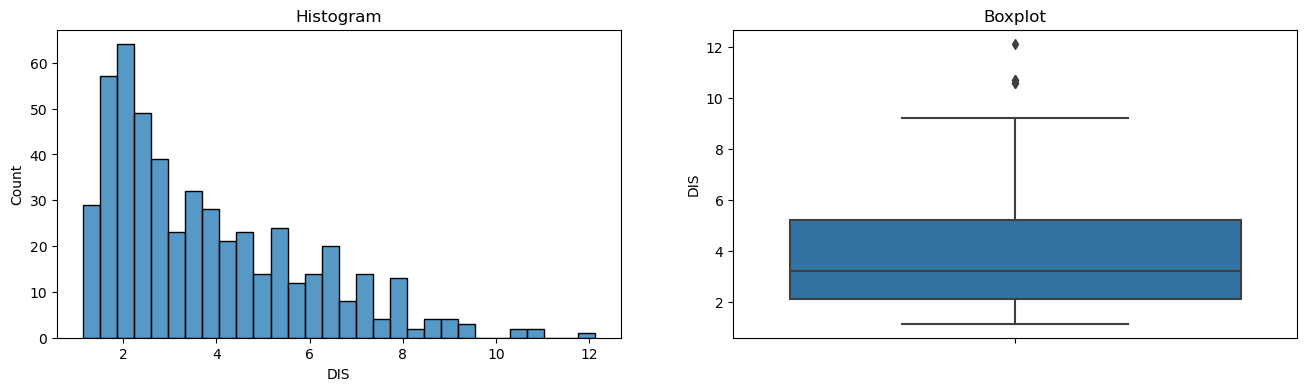


DIS - After Capping


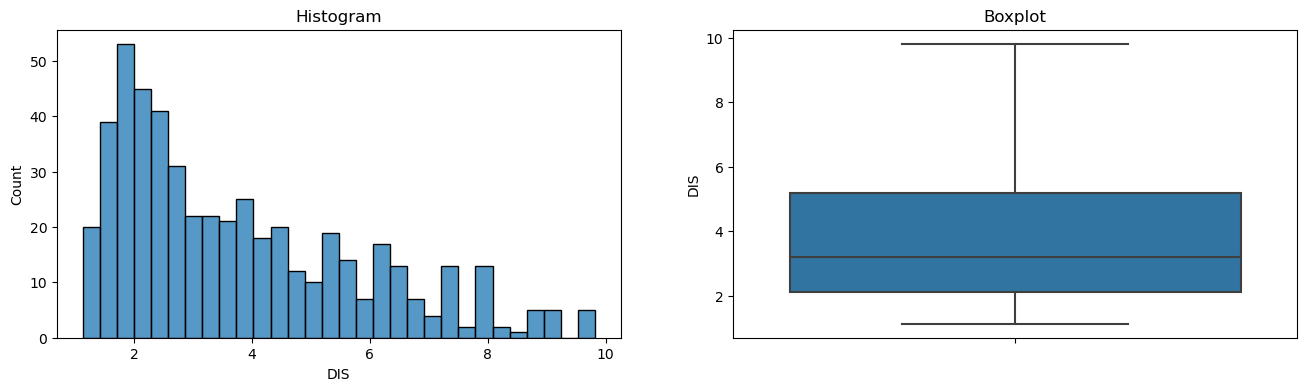


LSTAT - Before Capping


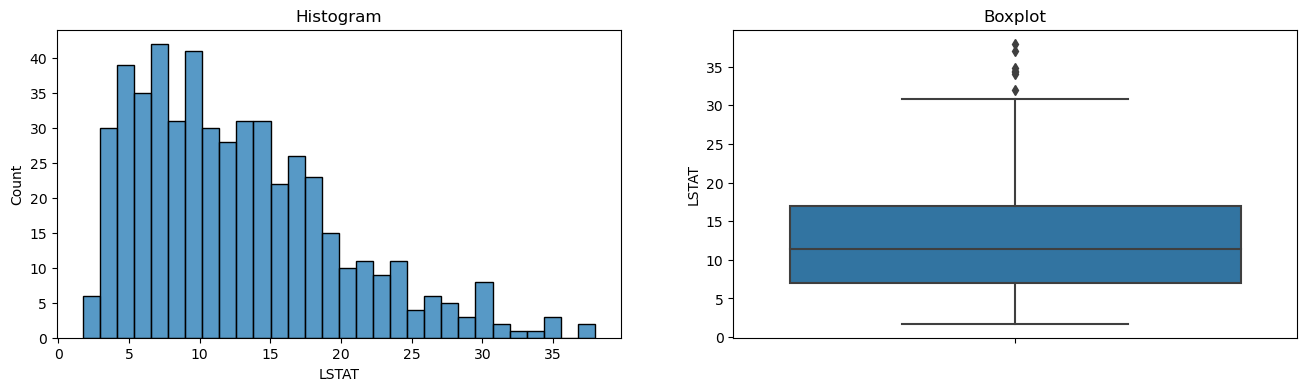


LSTAT - After Capping


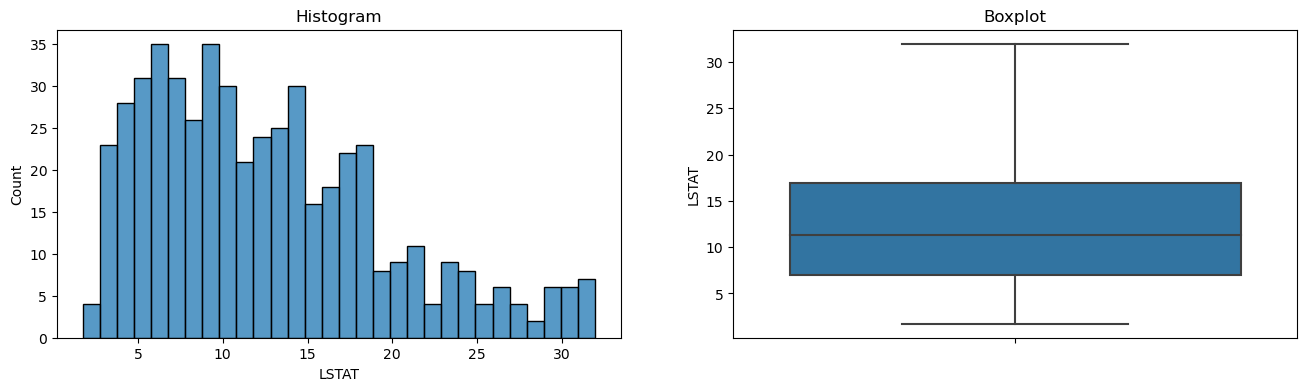


CRIM - Before Capping


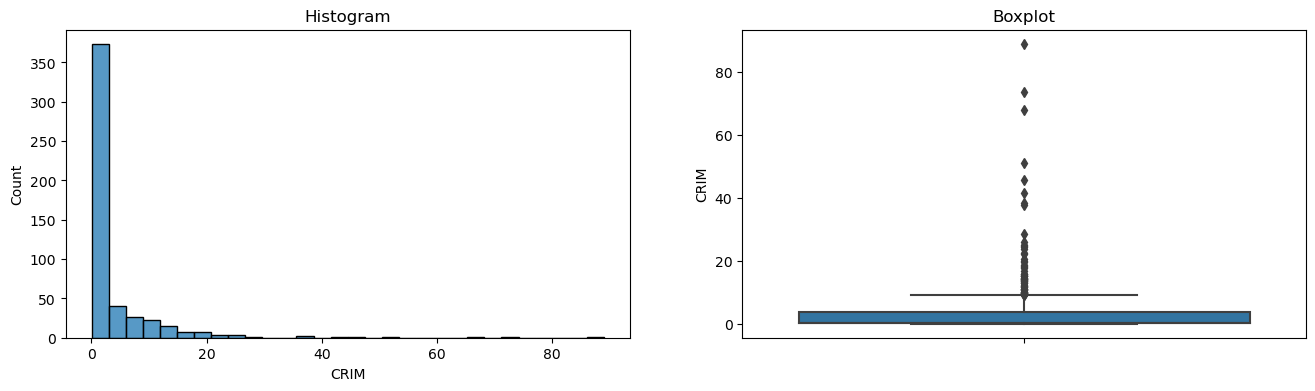


CRIM - After Capping


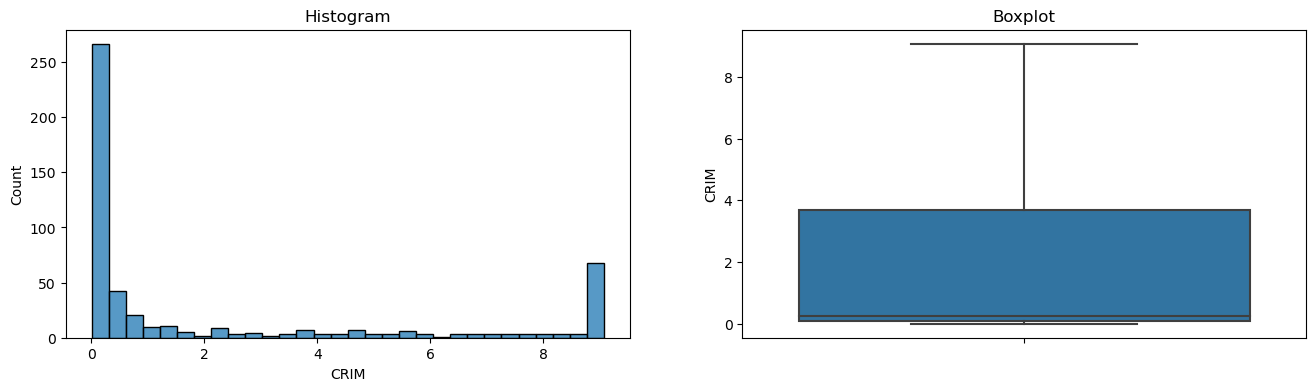

In [81]:
# Let's find outliers in `DIS`, `LSTAT`, `CRIM`

print('DIS - Before Capping')
diagnostic_plots(boston, 'DIS')
print('\nDIS - After Capping')
diagnostic_plots(boston_t, 'DIS')

print('\nLSTAT - Before Capping')
diagnostic_plots(boston, 'LSTAT')
print('\nLSTAT - After Capping')
diagnostic_plots(boston_t, 'LSTAT')

print('\nCRIM - Before Capping')
diagnostic_plots(boston, 'CRIM')
print('\nCRIM - After Capping')
diagnostic_plots(boston_t, 'CRIM')

# E. Kardinalitas

Nilai variabel kategori dipilih dari sekelompok kategori, juga disebut label. Misalnya pada variabel _gender_ kategori atau labelnya adalah laki-laki dan perempuan, sedangkan pada variabel _kota_ labelnya bisa London, Manchester, Brighton dan sebagainya.

Variabel kategori yang berbeda mengandung jumlah label atau kategori yang berbeda. Variabel jenis kelamin hanya berisi 2 label, tetapi variabel seperti kota atau kode pos, dapat berisi banyak sekali label berbeda.

Jumlah label yang berbeda dalam variabel kategori dikenal sebagai kardinalitas. Sejumlah besar label dalam variabel dikenal sebagai __kardinalitas tinggi__.


### Apakah beberapa label dalam variabel kategori menjadi masalah?

Kardinalitas tinggi dapat menimbulkan masalah berikut:

- Variabel dengan terlalu banyak label **cenderung mendominasi** daripada variabel dengan hanya sedikit label, terutama dalam algoritme **Berbasis pohon**.

- Sejumlah besar label dalam variabel dapat menimbulkan gangguan dengan sedikit, jika ada, informasi, sehingga membuat model pembelajaran mesin **cenderung over-fit**.

- Beberapa label mungkin **hanya ada di set data pelatihan, tetapi tidak di set pengujian**, oleh karena itu algoritme pembelajaran mesin mungkin terlalu sesuai dengan set pelatihan.

- Sebaliknya, **beberapa label mungkin hanya muncul di set pengujian**, sehingga membuat algoritme pembelajaran mesin tidak dapat melakukan penghitungan pada pengamatan baru (tak terlihat).


Secara khusus, **metode pohon dapat menjadi bias terhadap variabel dengan banyak label** (variabel dengan kardinalitas tinggi). Dengan demikian, kinerja mereka dapat dipengaruhi oleh kardinalitas tinggi.

## Tujuan :

Kami akan :

- Pelajari cara menghitung kardinalitas
- Lihat contoh variabel kardinalitas tinggi dan rendah
- Memahami efek kardinalitas saat menyiapkan rangkaian latihan dan pengujian
- Memvisualisasikan efek kardinalitas pada kinerja Model Pembelajaran Mesin

We will use the Titanic dataset. *(URL : https://www.openml.org/data/get_csv/16826755/phpMYEkMl)*

In [82]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

In [83]:
# Load the Titanic dataset

url = 'https://www.openml.org/data/get_csv/16826755/phpMYEkMl'
data = pd.read_csv(url)
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"


In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   pclass     1309 non-null   int64 
 1   survived   1309 non-null   int64 
 2   name       1309 non-null   object
 3   sex        1309 non-null   object
 4   age        1309 non-null   object
 5   sibsp      1309 non-null   int64 
 6   parch      1309 non-null   int64 
 7   ticket     1309 non-null   object
 8   fare       1309 non-null   object
 9   cabin      1309 non-null   object
 10  embarked   1309 non-null   object
 11  boat       1309 non-null   object
 12  body       1309 non-null   object
 13  home.dest  1309 non-null   object
dtypes: int64(4), object(10)
memory usage: 143.3+ KB


Mari kita fokus pada beberapa variabel kategori dalam dataset ini : `Name`, `Sex`, `Ticket`, `Cabin`, dan `Embarked`.

In [85]:
# Let's inspect the cardinality, this is the number of different labels, for the different categorical variables

print('Number of categories in the variable Name     : {}'.format(len(data.name.unique())))
print('Number of categories in the variable Gender   : {}'.format(len(data.sex.unique())))
print('Number of categories in the variable Ticket   : {}'.format(len(data.ticket.unique())))
print('Number of categories in the variable Cabin    : {}'.format(len(data.cabin.unique())))
print('Number of categories in the variable Embarked : {}'.format(len(data.embarked.unique())))
print('Total number of passengers in the Titanic.    : {}'.format(len(data)))

Number of categories in the variable Name     : 1307
Number of categories in the variable Gender   : 2
Number of categories in the variable Ticket   : 929
Number of categories in the variable Cabin    : 187
Number of categories in the variable Embarked : 4
Total number of passengers in the Titanic.    : 1309


Sementara variabel `Sex` hanya berisi 2 kategori dan `Embarked` 4 (kardinalitas rendah), variabel `Tiket`, `Nama` dan `Kabin`, seperti yang diharapkan, berisi sejumlah besar label berbeda (kardinalitas tinggi).

Untuk mendemonstrasikan efek kardinalitas tinggi dalam rangkaian latihan dan pengujian serta kinerja pembelajaran mesin, mari bekerja dengan variabel `Kabin`. Kami akan membuat variabel baru untuk mengurangi kardinalitas.

In [86]:
# Let's explore the values / categories of `Cabin`
# We know from the previous cell that there are 187 different cabins, therefore the variable is highly cardinal
data.cabin.unique()

array(['B5', 'C22 C26', 'E12', 'D7', 'A36', 'C101', '?', 'C62 C64', 'B35',
       'A23', 'B58 B60', 'D15', 'C6', 'D35', 'C148', 'C97', 'B49', 'C99',
       'C52', 'T', 'A31', 'C7', 'C103', 'D22', 'E33', 'A21', 'B10', 'B4',
       'E40', 'B38', 'E24', 'B51 B53 B55', 'B96 B98', 'C46', 'E31', 'E8',
       'B61', 'B77', 'A9', 'C89', 'A14', 'E58', 'E49', 'E52', 'E45',
       'B22', 'B26', 'C85', 'E17', 'B71', 'B20', 'A34', 'C86', 'A16',
       'A20', 'A18', 'C54', 'C45', 'D20', 'A29', 'C95', 'E25', 'C111',
       'C23 C25 C27', 'E36', 'D34', 'D40', 'B39', 'B41', 'B102', 'C123',
       'E63', 'C130', 'B86', 'C92', 'A5', 'C51', 'B42', 'C91', 'C125',
       'D10 D12', 'B82 B84', 'E50', 'D33', 'C83', 'B94', 'D49', 'D45',
       'B69', 'B11', 'E46', 'C39', 'B18', 'D11', 'C93', 'B28', 'C49',
       'B52 B54 B56', 'E60', 'C132', 'B37', 'D21', 'D19', 'C124', 'D17',
       'B101', 'D28', 'D6', 'D9', 'B80', 'C106', 'B79', 'C47', 'D30',
       'C90', 'E38', 'C78', 'C30', 'C118', 'D36', 'D48', 'D47', '

Sekarang mari kita kurangi kardinalitas variabel. Bagaimana? Alih-alih menggunakan seluruh nilai `cabin`, kami hanya akan menangkap
**surat pertama**.

***Dasar Pemikiran***: huruf pertama menunjukkan geladak tempat kabin berada, dan karena itu merupakan indikasi status kelas sosial dan kedekatan dengan permukaan Titanic. Keduanya dikenal untuk meningkatkan kemungkinan bertahan hidup.

In [87]:
# Let's capture the first letter of Cabin

data['Cabin_reduced'] = data['cabin'].astype(str).str[0]

print(data[['cabin', 'Cabin_reduced']].head())
print('Number of categories in the variable Cabin : {}'.format(len(data.cabin.unique())))
print('Number of categories in the variable Cabin reduced : {}'.format(len(data.Cabin_reduced.unique())))

     cabin Cabin_reduced
0       B5             B
1  C22 C26             C
2  C22 C26             C
3  C22 C26             C
4  C22 C26             C
Number of categories in the variable Cabin : 187
Number of categories in the variable Cabin reduced : 9


Kami mengurangi jumlah label berbeda dari 187 menjadi 9.

In [88]:
# Let's separate into training and testing set in order to build machine learning models

use_cols = ['cabin', 'Cabin_reduced', 'sex']

X_train, X_test, y_train, y_test = train_test_split(data[use_cols], 
                                                    data['survived'],  
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((916, 3), (393, 3))

### Kardinalitas yang tinggi menyebabkan distribusi kategori yang tidak merata dalam set pelatihan dan pengujian

Ketika sebuah variabel sangat kardinal, seringkali beberapa kategori hanya mendarat di set pelatihan, atau hanya di set pengujian. Jika hanya ada di set pelatihan, mereka dapat menyebabkan over-fitting. Jika hanya ada di set pengujian, algoritme pembelajaran mesin tidak akan tahu cara menanganinya, karena belum melihatnya selama pelatihan.

In [89]:
# Let's find out labels that only present in the training set and labels that only present in the test set

unique_to_train_set = [x for x in X_train.cabin.unique() if x not in X_test.cabin.unique()]
unique_to_test_set = [x for x in X_test.cabin.unique() if x not in X_train.cabin.unique()]

print('Total unique_to_train_set : ', len(unique_to_train_set))
print('Total unique_to_test_set  : ', len(unique_to_test_set))

Total unique_to_train_set :  116
Total unique_to_test_set  :  36


Ada **116 Kabin yang hanya ada di set pelatihan**, dan tidak ada di set pengujian. Selain itu, ada **36 Kabin yang hanya ada di set pengujian** tetapi tidak ada di set kereta.

Variabel dengan kardinalitas tinggi cenderung memiliki nilai (yaitu, kategori) yang ada di set pelatihan, yang tidak ada di set tes, dan sebaliknya. Ini akan menimbulkan masalah pada saat pelatihan (karena pemasangan yang berlebihan) dan penilaian data baru (bagaimana seharusnya model menangani kategori yang tidak terlihat?). Masalah ini hampir dapat diatasi dengan mengurangi kardinalitas variabel.

In [90]:
# Let's find out labels that only present in the training set and only present in the test set for Cabin with reduced cardinality

unique_to_train_set = [
    x for x in X_train['Cabin_reduced'].unique()
    if x not in X_test['Cabin_reduced'].unique()
]

unique_to_test_set = [
    x for x in X_test['Cabin_reduced'].unique()
    if x not in X_train['Cabin_reduced'].unique()
]

print('Total unique_to_train_set : ', len(unique_to_train_set))
print('Total unique_to_test_set  : ', len(unique_to_test_set))

Total unique_to_train_set :  1
Total unique_to_test_set  :  0


Amati bagaimana dengan mengurangi kardinalitas, kini **hanya ada 1 label di set pelatihan** yang tidak ada di set pengujian. Dan **tidak ada label di set pengujian** yang juga tidak terdapat di set pelatihan.

### Effect of cardinality on Machine Learning Model Performance

In order to evaluate the effect of categorical variables in machine learning models, we will quickly replace the categories by numbers. See below.

In [91]:
# Let's re-map Cabin into numbers so we can use it to train ML models

# I will replace each cabin by a number
# to quickly demonstrate the effect of
# labels on machine learning algorithms

cabin_dict = {k: i for i, k in enumerate(X_train.cabin.unique(), 0)}
print('cabin_dict : ', cabin_dict)
print('Total Cabin Unique - X_train : ', len(X_train.cabin.unique()))
print('Total Cabin Unique - Data    : ', len(data.cabin.unique()))

cabin_dict :  {'?': 0, 'E36': 1, 'C68': 2, 'E24': 3, 'C22 C26': 4, 'D38': 5, 'B50': 6, 'A24': 7, 'C111': 8, 'F': 9, 'C6': 10, 'C87': 11, 'E8': 12, 'B45': 13, 'C93': 14, 'D28': 15, 'D36': 16, 'C125': 17, 'B35': 18, 'T': 19, 'B73': 20, 'B57 B59 B63 B66': 21, 'A26': 22, 'A18': 23, 'B96 B98': 24, 'G6': 25, 'C78': 26, 'C101': 27, 'D9': 28, 'D33': 29, 'C128': 30, 'E50': 31, 'B26': 32, 'B69': 33, 'E121': 34, 'C123': 35, 'B94': 36, 'A34': 37, 'D': 38, 'C39': 39, 'D43': 40, 'E31': 41, 'B5': 42, 'D17': 43, 'F33': 44, 'E44': 45, 'D7': 46, 'A21': 47, 'D34': 48, 'A29': 49, 'D35': 50, 'A11': 51, 'B51 B53 B55': 52, 'D46': 53, 'E60': 54, 'C30': 55, 'D26': 56, 'E68': 57, 'A9': 58, 'B71': 59, 'D37': 60, 'F2': 61, 'C55 C57': 62, 'C89': 63, 'C124': 64, 'C23 C25 C27': 65, 'C126': 66, 'E49': 67, 'F E46': 68, 'E46': 69, 'D19': 70, 'B58 B60': 71, 'C82': 72, 'B52 B54 B56': 73, 'C92': 74, 'E45': 75, 'F G73': 76, 'C65': 77, 'E25': 78, 'B3': 79, 'D40': 80, 'C91': 81, 'B102': 82, 'B61': 83, 'F G63': 84, 'A20': 85,

In [92]:
# Replace the labels in Cabin, using the dict `cabin_dict` created above
X_train.loc[:, 'Cabin_mapped'] = X_train.loc[:, 'cabin'].map(cabin_dict)
X_test.loc[:, 'Cabin_mapped'] = X_test.loc[:, 'cabin'].map(cabin_dict)

X_train[['Cabin_mapped', 'cabin']].head(10)

,Cabin_mapped,cabin
501,0,?
588,0,?
402,0,?
1193,0,?
686,0,?
971,0,?
117,1,E36
540,0,?
294,2,C68
261,3,E24


In [93]:
# Display First 10 Data in `X_train`
X_train.head(10)

,cabin,Cabin_reduced,sex,Cabin_mapped
501,?,?,female,0
588,?,?,female,0
402,?,?,female,0
1193,?,?,male,0
686,?,?,female,0
971,?,?,male,0
117,E36,E,female,1
540,?,?,female,0
294,C68,C,male,2
261,E24,E,male,3


Kita lihat bagaimana NaN mengambil nilai 0 pada variabel baru, E36 mengambil nilai 1, C68 mengambil nilai 2, dan seterusnya.

In [94]:
# Now we will replace the letters in the reduced cabin variable (`Cabin_reduced`) with the same procedure

# Create replace dictionary
cabin_dict = {k: i for i, k in enumerate(X_train['Cabin_reduced'].unique(), 0)}

print('Before Replace')
print(X_train[['Cabin_reduced', 'cabin']].head(10))
print('')

# Replace labels by numbers with dictionary
X_train.loc[:, 'Cabin_reduced'] = X_train.loc[:, 'Cabin_reduced'].map(cabin_dict)
X_test.loc[:, 'Cabin_reduced'] = X_test.loc[:, 'Cabin_reduced'].map(cabin_dict)

print('After Replace')
print(X_train[['Cabin_reduced', 'cabin']].head(10))
print('')

Before Replace
     Cabin_reduced cabin
501              ?     ?
588              ?     ?
402              ?     ?
1193             ?     ?
686              ?     ?
971              ?     ?
117              E   E36
540              ?     ?
294              C   C68
261              E   E24

After Replace
      Cabin_reduced cabin
501               0     ?
588               0     ?
402               0     ?
1193              0     ?
686               0     ?
971               0     ?
117               1   E36
540               0     ?
294               2   C68
261               1   E24



C:\Users\ASUS\AppData\Local\Temp\ipykernel_14356\800770103.py:11: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X_train.loc[:, 'Cabin_reduced'] = X_train.loc[:, 'Cabin_reduced'].map(cabin_dict)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_14356\800770103.py:12: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X_test.loc[:, 'Cabin_reduced'] = X_test.loc[:, 'Cabin_reduced'].map(cabin_dict)


In [95]:
# Display First 10 Data in `X_train`
X_train.head(10)

,cabin,Cabin_reduced,sex,Cabin_mapped
501,?,0,female,0
588,?,0,female,0
402,?,0,female,0
1193,?,0,male,0
686,?,0,female,0
971,?,0,male,0
117,E36,1,female,1
540,?,0,female,0
294,C68,2,male,2
261,E24,1,male,3


Sekarang kita lihat bahwa E36 dan E24 mengambil angka yang sama, 1, karena kita hanya menangkap hurufnya. Keduanya dimulai dengan E.

In [97]:
# Re-map the categorical variable `Sex` into numbers

X_train.loc[:, 'sex'] = X_train.loc[:, 'sex'].map({'male': 0, 'female': 1})
X_test.loc[:, 'sex'] = X_test.loc[:, 'sex'].map({'male': 0, 'female': 1})

X_train.sex.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14356\1300005932.py:3: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X_train.loc[:, 'sex'] = X_train.loc[:, 'sex'].map({'male': 0, 'female': 1})
C:\Users\ASUS\AppData\Local\Temp\ipykernel_14356\1300005932.py:4: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X_test.loc[:, 'sex'] = X_test.loc[:, 'sex'].map({'male': 0, 'female': 1})


501     1
588     1
402     1
1193    0
686     1
Name: sex, dtype: int64

In [98]:
# Check if there are missing values in these variables

X_train[['Cabin_mapped', 'Cabin_reduced', 'sex']].isnull().sum()

Cabin_mapped     0
Cabin_reduced    0
sex              0
dtype: int64

In [99]:
X_test[['Cabin_mapped', 'Cabin_reduced', 'sex']].isnull().sum()

Cabin_mapped     42
Cabin_reduced     0
sex               0
dtype: int64

In [100]:
# Display row in `X_test` that contains missing values
X_test[X_test.isna().any(axis=1)]

,cabin,Cabin_reduced,sex,Cabin_mapped
5,E12,1,0,NaN
231,C104,2,0,NaN
31,A31,5,0,NaN
161,D11,3,1,NaN
215,D48,3,0,NaN
141,D10 D12,3,1,NaN
45,B38,4,0,NaN
152,D45,3,0,NaN
233,C50,2,1,NaN
268,C31,2,0,NaN


Di set pengujian, sekarang ada **42 nilai yang hilang** untuk variabel yang sangat utama. Ini diperkenalkan saat menyandikan kategori menjadi angka. Bagaimana? **Banyak kategori hanya ada di set pengujian.** Jadi, saat kami membuat kamus enkode hanya menggunakan set rangkaian, kami tidak menghasilkan angka untuk menggantikan label yang hanya ada di set pengujian. Akibatnya, mereka dikodekan sebagai NaN. Untuk saat ini, mari isi nilai yang hilang itu dengan 0.

In [101]:
# Display X_train
X_train.head(10)

,cabin,Cabin_reduced,sex,Cabin_mapped
501,?,0,1,0
588,?,0,1,0
402,?,0,1,0
1193,?,0,0,0
686,?,0,1,0
971,?,0,0,0
117,E36,1,1,1
540,?,0,1,0
294,C68,2,0,2
261,E24,1,0,3


## Random Forest

In [102]:
# Model built on data with high cardinality for cabin

# Call the model
rf = RandomForestClassifier(n_estimators=200, random_state=39)

# Train the model
rf.fit(X_train[['Cabin_mapped', 'sex']], y_train)

# Make predictions on train and test set
pred_train = rf.predict_proba(X_train[['Cabin_mapped', 'sex']])
pred_test = rf.predict_proba(X_test[['Cabin_mapped', 'sex']].fillna(0))

print('Train set')
print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred_train[:,1])))
print('Test set')
print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred_test[:,1])))

Train set
Random Forests roc-auc: 0.8561832352985574
Test set
Random Forests roc-auc: 0.7707953099939163


Kami mengamati bahwa performa Hutan Acak pada set pelatihan cukup unggul dibandingkan performanya pada set pengujian. Hal ini menunjukkan bahwa model tersebut terlalu pas, yang berarti bahwa model tersebut bekerja dengan sangat baik dalam memprediksi hasil pada kumpulan data tempat ia dilatih, tetapi tidak memiliki kemampuan untuk menggeneralisasikan prediksi ke data yang tidak terlihat.

In [103]:
# Model built on data with low cardinality for cabin

# Call the model
rf = RandomForestClassifier(n_estimators=200, random_state=39)

# Train the model
rf.fit(X_train[['Cabin_reduced', 'sex']], y_train)

# Make predictions on train and test set
pred_train = rf.predict_proba(X_train[['Cabin_reduced', 'sex']])
pred_test = rf.predict_proba(X_test[['Cabin_reduced', 'sex']])

print('Train set')
print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred_train[:,1])))
print('Test set')
print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred_test[:,1])))

Train set
Random Forests roc-auc: 0.8163420365403872
Test set
Random Forests roc-auc: 0.8017670482827277


Kita dapat melihat sekarang bahwa Hutan Acak tidak lagi terlalu sesuai dengan set pelatihan. Selain itu, model jauh lebih baik dalam menggeneralisasi prediksi (bandingkan roc-auc model ini pada set pengujian vs roc-auc model di atas juga pada set pengujian: 0,81 vs 0,80).

**Mengingat model yang sama, dengan hyper-parameter identik, kardinalitas tinggi dapat menyebabkan model terlalu pas**.

## Logistic Regression

In [104]:
# Model build on data with plenty of categories in Cabin variable

# Call the model
logit = LogisticRegression(random_state=44, solver='lbfgs')

# Train the model
logit.fit(X_train[['Cabin_mapped', 'sex']], y_train)

# Make predictions on train and test set
pred_train = logit.predict_proba(X_train[['Cabin_mapped', 'sex']])
pred_test = logit.predict_proba(X_test[['Cabin_mapped', 'sex']].fillna(0))

print('Train set')
print('Logistic regression roc-auc: {}'.format(roc_auc_score(y_train, pred_train[:,1])))
print('Test set')
print('Logistic regression roc-auc: {}'.format(roc_auc_score(y_test, pred_test[:,1])))

Train set
Logistic regression roc-auc: 0.8135594926008485
Test set
Logistic regression roc-auc: 0.7744732039157127


In [105]:
# Model build on data with fewer categories in Cabin Variable

# Call the model
logit = LogisticRegression(random_state=44, solver='lbfgs')

# Train the model
logit.fit(X_train[['Cabin_reduced', 'sex']], y_train)

# Make predictions on train and test set
pred_train = logit.predict_proba(X_train[['Cabin_reduced', 'sex']])
pred_test = logit.predict_proba(X_test[['Cabin_reduced', 'sex']].fillna(0))

print('Train set')
print('Logistic regression roc-auc: {}'.format(roc_auc_score(y_train, pred_train[:,1])))
print('Test set')
print('Logistic regression roc-auc: {}'.format(roc_auc_score(y_test, pred_test[:,1])))

Train set
Logistic regression roc-auc: 0.8123468468695123
Test set
Logistic regression roc-auc: 0.8008268347989602


Kita dapat menarik kesimpulan yang sama untuk Regresi Logistik: **mengurangi kardinalitas meningkatkan kinerja dan generalisasi algoritme**.